## Machine Learning

### Laura Licerio

Información del dataset:

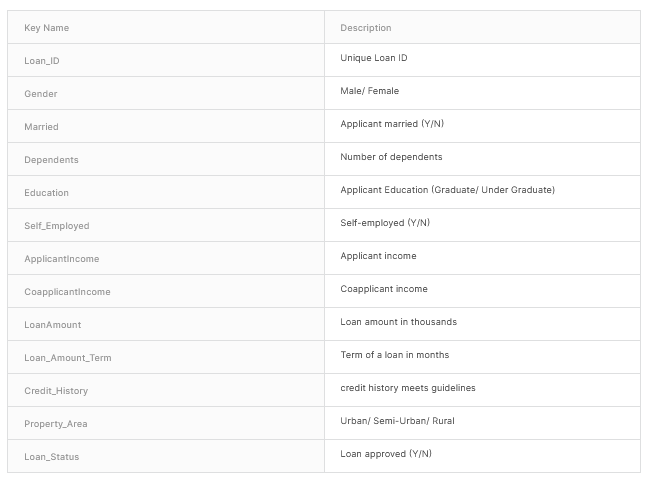

In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv("loan_ds.csv")

In [3]:
ds.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
ds_step0 = ds.drop('Loan_ID', axis = 1)

In [5]:
ds_step0.shape

(614, 12)

In [6]:
ds_step0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Hay nulos en las columnas: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History

In [7]:
ds_step1 = ds_step0.dropna(subset=['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], axis =0)

In [8]:
ds_step1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


Ya no hay filas con valores nulos, ahora se exploran las columnas categoricas, para posteriormente hacer el reemplazo a valores numéricos

In [9]:
#funcion para detectar tipo de dato objeto en columnas, y hacer el conteo de los valores categoricos
def explore_object_type(df ,column_name):  
    if df[column_name].dtype ==  'object':
        print(df[column_name].value_counts())
        
        

In [10]:
for columnName in ds_step1.columns:
    if ds_step1[columnName].dtype == 'object':
        print('\n' + 'Conteo de valores de la columna '  + str(columnName) + ':')
        explore_object_type(ds_step1, str(columnName))


Conteo de valores de la columna Gender:
Male      394
Female     86
Name: Gender, dtype: int64

Conteo de valores de la columna Married:
Yes    311
No     169
Name: Married, dtype: int64

Conteo de valores de la columna Dependents:
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

Conteo de valores de la columna Education:
Graduate        383
Not Graduate     97
Name: Education, dtype: int64

Conteo de valores de la columna Self_Employed:
No     414
Yes     66
Name: Self_Employed, dtype: int64

Conteo de valores de la columna Property_Area:
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

Conteo de valores de la columna Loan_Status:
Y    332
N    148
Name: Loan_Status, dtype: int64


In [11]:
ds_final = ds_step1.copy()
    
ds_final['Gender'] = ds_step1['Gender'].replace({"Male":1,"Female":0})
ds_final['Married'] = ds_step1['Married'].replace({"Yes" : 1, "No" : 0})
ds_final['Dependents'] = ds_step1['Dependents'].replace({"0": 0, "1": 1, "2": 2,"3+" : 3})
ds_final['Education'] = ds_step1['Education'].replace({"Graduate" : 1, "Not Graduate" : 0})
ds_final['Self_Employed'] = ds_step1['Self_Employed'].replace({"Yes" : 1, "No" : 0})
ds_final['Property_Area'] = ds_step1['Property_Area'].replace({"Semiurban" : 0, "Urban" : 1,  "Rural" : 2 })
ds_final['Loan_Status'] = ds_step1['Loan_Status'].replace({"Y" : 1, "N" : 0})


In [12]:
ds_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 48.8 KB


In [13]:
ds_final.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1
7,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,0,0
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,1,1
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,0,0
10,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,1,1


In [14]:
ds_final.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.891667,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.822906,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [15]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

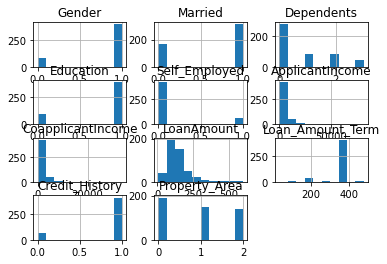

In [16]:
ds_final.drop('Loan_Status',axis=1).hist()
plt.show()

In [18]:
X = np.array(ds_final.drop('Loan_Status',axis=1))
y = np.array(ds_final['Loan_Status'])
X.shape

(480, 11)

In [42]:
########## IMPLEMENTACIÓN DE REGRESIÓN LOGÍSTICA ##########
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,random_state=0)
#Se escalan todos los datos
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
predictions = model.predict(X)
print(predictions[0:30])

[1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1]


In [45]:
model.score(X,y)

0.525

In [48]:
validation_size = 0.25
seed = 9
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [49]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.5083333333333333


In [50]:
print(confusion_matrix(Y_validation, predictions))

[[ 8 27]
 [32 53]]


In [51]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.20      0.23      0.21        35
           1       0.66      0.62      0.64        85

    accuracy                           0.51       120
   macro avg       0.43      0.43      0.43       120
weighted avg       0.53      0.51      0.52       120



El score del modelo es medio (52.5%), su nivel de acuracy es medio tambien (50.8%). 

El resumen del reporte de clasificación indica: 
Para los valores de Loan_Status = 0 , base 35 filas,la precisión y exactitud son bajas (20% y 23% respectivamente).
El porcentaje de predicciones positivas correctas es bajo (21%)

Para los valores de Loan_Status = 1 , base 85 filas,la precisión y exactitud son medias (66% y 62% respectivamente).
El porcentaje de predicciones positivas correctas es medio (64%)

Quiza con mayor número de registros se hubieran obtenido mejores resultados.


In [52]:
X_new = pd.DataFrame({'Gender': [1],
                    'Married': [0],   
                    'Dependents': [1],
                    'Education': [0],
                    'Self_Employed':[0],
                    'ApplicantIncome':[5720],
                    'CoapplicantIncome':[0],
                    'LoanAmount':[110],
                    'Loan_Amount_Term':[360],
                    'Credit_History':[1],
                    'Property_Area':[2]  
                      
                     })
model.predict(X_new)

array([1], dtype=int64)